# Misura indice rifrazione aria

$2 \cdot d \cdot m \cdot (P_i − P_f ) =  \Delta N \cdot \lambda $


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys
from jax import grad
from jax import numpy as jnp

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from giopy import Interpolazione, final_val
from interpolazione import Interpolazione as LinearInterpolation

sys.path.append(dir_path)

- $\sigma_P = 2kPa$
- $d = 3cm$
- $P_{atm} = 1017hpa$

$ \Delta P = \frac{\lambda}{2dm}\Delta N$

In [2]:
ΔN = np.array([6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18])
ΔP = -1*np.array([-30, -35, -45, -50, -55, -60, -65, -70, -75, -80, -85]) * 10**3 # kpa

sigmaP = 2000
Patm = 101700
sigmaPatm = 100
d = 0.03
sigmad = 0.0001
λ = 632.8 * 10**-9

   
Parameters: {'A': 4674.540682532134} 
Sigma parameters: {'A': 38.4000352157239}

sigmaY: 2000

chiquadro ridotto: 0.58
df: 10
pvalue: 100.0%
covariance matrix: [[1218.64686328]]    



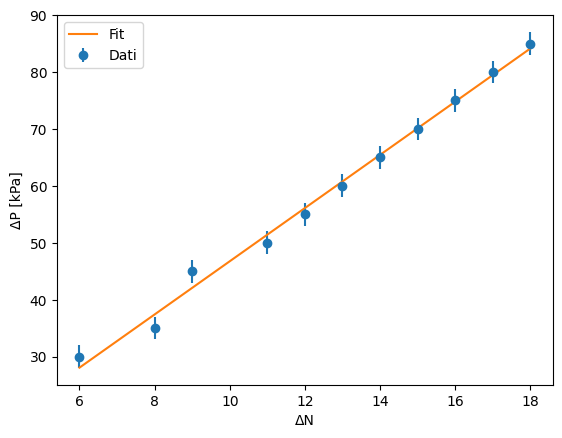

In [3]:
plt.errorbar(ΔN, ΔP, yerr=sigmaP, fmt='o', label='Dati')

fit = LinearInterpolation(ΔN, ΔP,lambda x,A: x*A, sigmaP,p0=[1],names='A')
print(fit)

plt.plot(fit.x_best, fit.y_best, label='Fit')
plt.xlabel('ΔN')
plt.ylabel('ΔP [kPa]')
plt.yticks(np.arange(30000, 100000, 10*10**3), np.arange(30, 100, 10))
plt.legend()
plt.show()

$n = m \cdot P + 1$

$m = \frac{\lambda}{2dA}$

In [4]:
A,sigmaA = fit.bval['A'],fit.sigma_bval['A']

m = λ/(2*d*A)
sigmam = np.sqrt(((λ/(2*d*(A**2)))*sigmaA)**2 + ((λ/(2*(d**2)*A))*sigmad)**2)

n = m*Patm + 1
sigman = np.sqrt((sigmam*Patm)**2)# + (sigmaPatm*m)**2)

print('m: ',final_val(m,sigmam,exp=-10,udm='Pa^-1'))

n *= 1000
sigman *= 1000
print('n_aria (x1000): ',final_val(n,sigman,decimals=4))

n = n/1000
sigman = sigman/1000
n_t = 1.000294 # teorico

print('n (teorico) (x1000): ',n_t*1000)

t = np.abs(n-n_t)/sigman

print('t-test: ',np.round(t))

print('errore relativo A: ',np.round(sigmaA/A,3))
print('errore relativo m: ',np.round(sigmam/m,3))
print('errore relativo n: ',np.round(sigman/n,6))

m:  (22.56 ± 0.2)e-10 Pa^-1
n_aria (x1000):  1000.2295 ± 0.002 
n (teorico) (x1000):  1000.294
t-test:  32.0
errore relativo A:  0.008
errore relativo m:  0.009
errore relativo n:  2e-06


L'indice di rifrazione atteso (mediante t-test) non è compatibile con il risultato atteso, ipotiziamo:
- L'indice di rifrazione dell'aria teorico non considera l'umidità
- L'incertezza è sottostimata: